## Diffrent Kernels

In [1]:
from skimage import data
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = data.astronaut()

In [3]:
image.shape

(512, 512, 3)

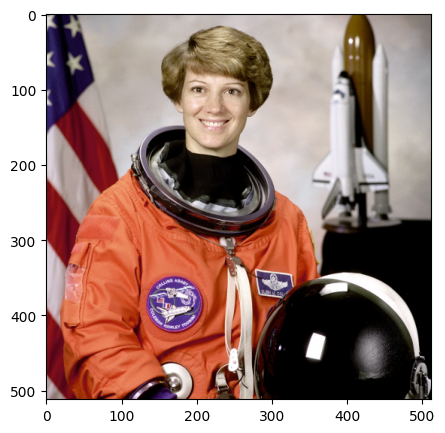

In [4]:
plt.figure(figsize=(5, 5))
plt.imshow(image)

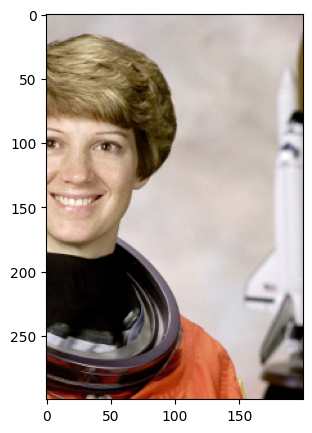

In [5]:
plt.figure(figsize=(5, 5))
plt.imshow(image[:300, 200:400, :])

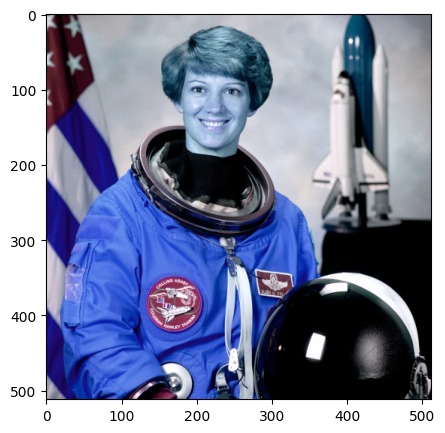

In [6]:
plt.figure(figsize=(5, 5))
plt.imshow(image[:, :, ::-1])

Kernel Shape: (3, 3)


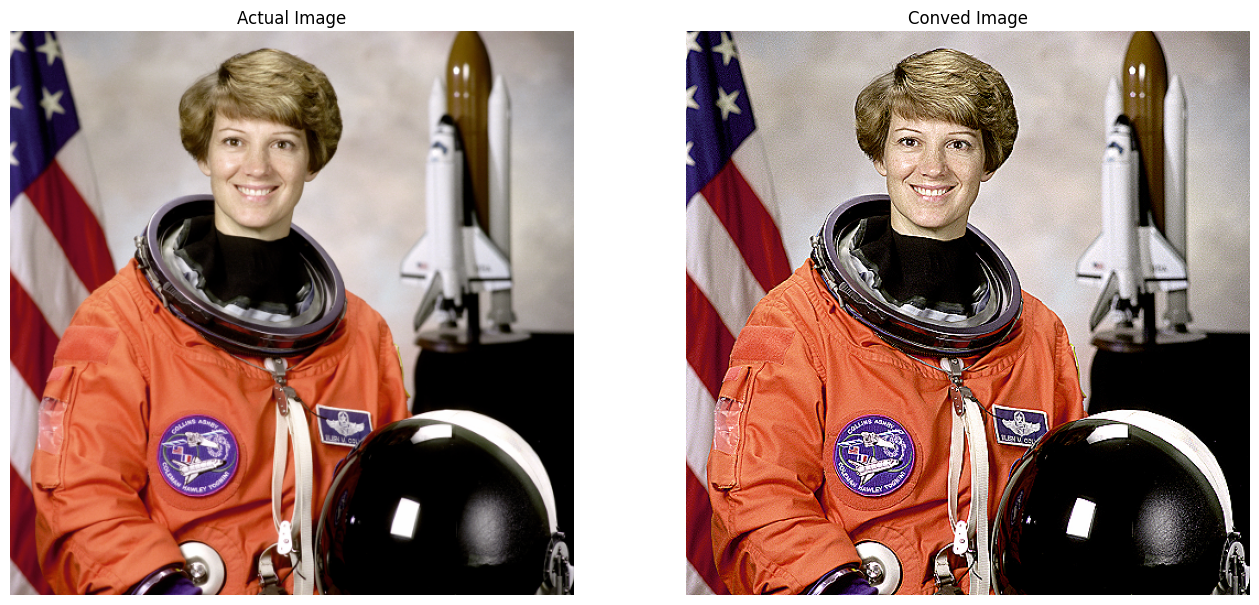

In [8]:
# https://setosa.io/ev/image-kernels/
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
if kernel.sum():
  kenel = kernel / kernel.sum()

conved_img = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 32))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Actual Image')

ax[1].imshow(conved_img)
ax[1].axis('off')
ax[1].set_title('Conved Image')

print(f"Kernel Shape: {kernel.shape}")

Kernel Shape: (3, 3)


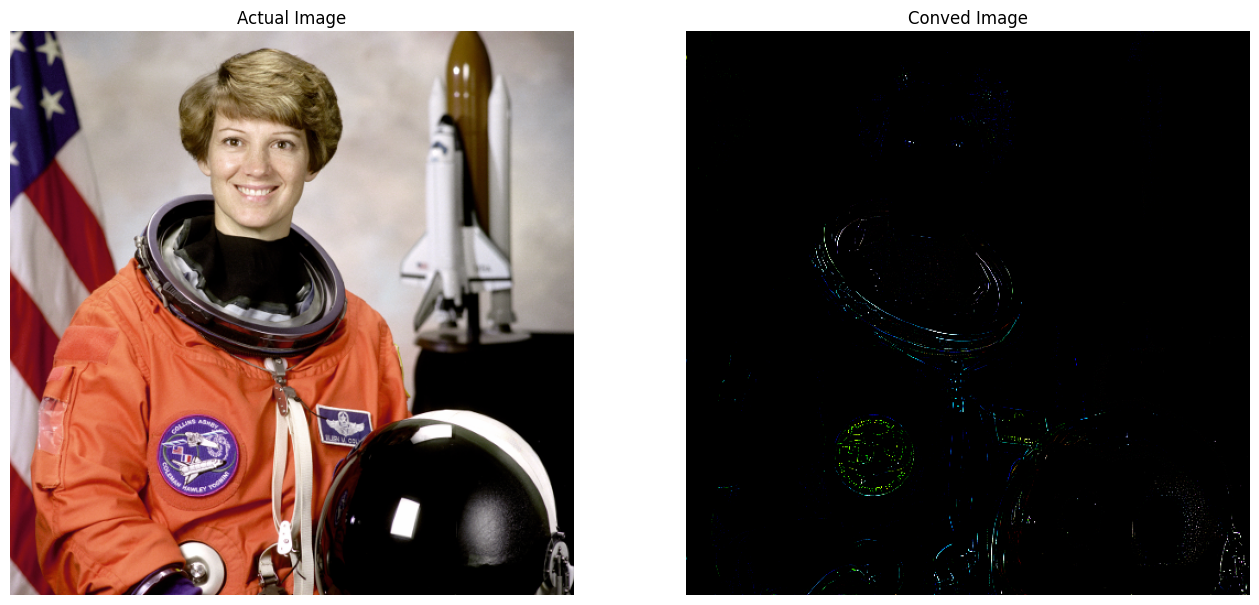

In [9]:
kernel = np.array([[-1, -1, -1],
                   [-1, 6, -1],
                   [-1, -1, -1]])
if kernel.sum():
  kenel = kernel / kernel.sum()

conved_img = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 32))
ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('Actual Image')

ax[1].imshow(conved_img)
ax[1].axis('off')
ax[1].set_title('Conved Image')

print(f"Kernel Shape: {kernel.shape}")

## MNIST

In [10]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Labels: 7


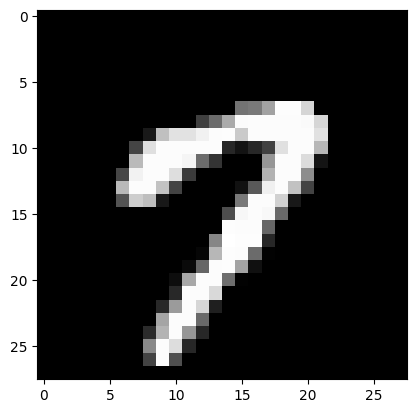

In [13]:
image_index = 15
plt.imshow(x_train[image_index], cmap='gray')
print(f"Labels: {y_train[image_index]}")

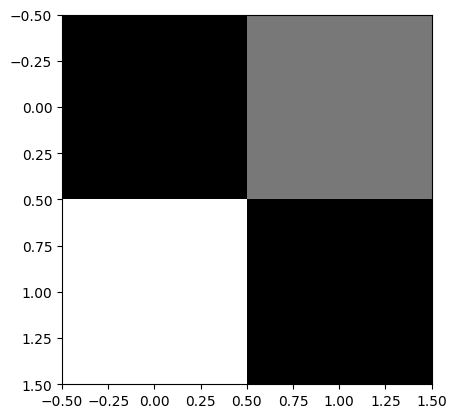

In [14]:
image_array = np.array([[0, 120],
                        [255, 0]])
plt.imshow(image_array, cmap='gray')

## ANN

In [25]:
x_train_f = x_train.reshape(-1, 28*28) / 255
x_test_f = x_test.reshape(-1, 28*28) / 255

In [26]:
x_train_f.shape, x_test_f.shape

((60000, 784), (10000, 784))

In [30]:
from keras.utils import to_categorical

num_classes = 10
y_train_f = to_categorical(y_train, num_classes)
y_test_f = to_categorical(y_test, num_classes)

In [31]:
y_train_f.shape, y_test_f.shape

((60000, 10), (10000, 10))

In [32]:
from keras.layers import Dense, Input
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(Input(shape=(28*28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 16478 (64.37 KB)
Trainable params: 16478 (64.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
batch_size = 128
epochs = 30
model.fit(
    x_train_f, y_train_f,
    batch_size=batch_size, epochs=epochs,
    validation_data=(x_test_f, y_test_f)
    )

Epoch 1/30
469/469 [==============================] - 4s 6ms/step - loss: 0.7397 - accuracy: 0.7645 - val_loss: 0.3106 - val_accuracy: 0.9115
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.9194 - val_loss: 0.2593 - val_accuracy: 0.9261
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.9316 - val_loss: 0.2285 - val_accuracy: 0.9327
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2049 - accuracy: 0.9409 - val_loss: 0.1951 - val_accuracy: 0.9447
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1842 - accuracy: 0.9462 - val_loss: 0.1846 - val_accuracy: 0.9466
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.9496 - val_loss: 0.1730 - val_accuracy: 0.9509
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1596 - accuracy: 0.9528 - val_loss: 0.1659 - val_accuracy: 0.9531
Epoch 